# Comunida de madrid

In [1]:
import pandas as pd
import sys
import os
import glob
sys.path.append('../src')
import cargadata as cdat
import datetime
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go

In [2]:
contenido = os.listdir('../data/')
contenido

['1_am_ca',
 '2020_meteorologia_cm.zip',
 '2021_meteorologia_cm.zip',
 '2_cm_ca',
 'calidad_aire_estaciones.csv',
 'descripcion-fichero-open-data-meteorologico.pdf',
 'informacion_estaciones_red_calidad_aire__ayunta.csv',
 'informacion_estaciones_red_calidad_aire__ayunta.geo',
 'zonas_calidad_aire']

In [3]:
con_a2021 = os.listdir('../data/2_cm_ca/2020')
con_a2021

['2020_01.csv',
 '2020_02.csv',
 '2020_03.csv',
 '2020_04.csv',
 '2020_05.csv',
 '2020_06.csv',
 '2020_07.csv',
 '2020_08.csv',
 '2020_09.csv',
 '2020_10.csv',
 '2020_11.csv',
 '2020_12.csv']

In [4]:
df = pd.read_csv('../data/2_cm_ca/2020/2020_01.csv', sep = ';')

Exploramos el data set suelto

In [5]:
df.head(10)

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,102,1,1,28102001_1_38,2020,1,1,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
1,28,102,1,6,28102001_6_48,2020,1,1,0.3,V,...,0.4,V,0.4,V,0.4,V,0.4,V,0.4,V
2,28,102,1,7,28102001_7_8,2020,1,1,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
3,28,102,1,8,28102001_8_8,2020,1,1,8.0,V,...,8.0,V,8.0,V,9.0,V,10.0,V,8.0,V
4,28,102,1,10,28102001_10_49,2020,1,1,8.0,V,...,16.0,V,16.0,V,17.0,V,17.0,V,17.0,V
5,28,102,1,12,28102001_12_8,2020,1,1,10.0,V,...,10.0,V,10.0,V,11.0,V,12.0,V,10.0,V
6,28,102,1,14,28102001_14_6,2020,1,1,39.0,V,...,52.0,V,50.0,V,42.0,V,41.0,V,39.0,V
7,28,120,1,7,28120001_7_8,2020,1,1,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
8,28,120,1,8,28120001_8_8,2020,1,1,2.0,V,...,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V
9,28,120,1,9,28120001_9_49,2020,1,1,8.0,V,...,1.0,V,1.0,V,2.0,V,2.0,V,1.0,V


Vamos a gestionara los datos marcados como no válidos. si son no validos los voy a igualar al anterior si válido

In [6]:
df[f'v01'].value_counts()

V    4923
N      37
Name: v01, dtype: int64

Pacece que cada columna suel tener alrederor de 20 valores así


Primero voy a convertir estos valores en Nan;

In [7]:
horas = ['01', '02','03','04','05', '06', '07', '08', '09', '10', '11', '12',
         '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']

In [8]:
columns_names = ['provincia', 'municipio', 'estacion', 'magnitud', 'punto_muestreo',
       'year', 'month', 'day', 'h01', 'v01', 'h02', 'v02', 'h03', 'v03', 'h04',
       'v04', 'h05', 'v05', 'h06', 'v06', 'h07', 'v07', 'h08', 'v08', 'h09',
       'v09', 'h10', 'v10', 'h11', 'v11', 'h12', 'v12', 'h13', 'v13', 'h14',
       'v14', 'h15', 'v15', 'h16', 'v16', 'h17', 'v17', 'h18', 'v18', 'h19',
       'v19', 'h20', 'v20', 'h21', 'v21', 'h22', 'v22', 'h23', 'v23', 'h24',
       'v24']

paso a minusculas las colunas 

In [9]:
df.set_axis(columns_names, axis='columns', inplace=True)

In [10]:
df.sample(20)
    

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
2842,28,65,14,8,28065014_8_8,2020,1,18,44.0,V,...,21.0,V,22.0,V,19.0,V,18.0,V,13.0,V
3947,28,58,4,30,28058004_30_59,2020,1,25,0.7,V,...,1.1,V,0.9,V,0.8,V,1.0,V,0.9,V
3311,28,6,4,7,28006004_7_8,2020,1,21,1.0,V,...,3.0,V,2.0,V,2.0,V,1.0,V,1.0,V
1831,28,45,2,7,28045002_7_8,2020,1,12,11.0,V,...,71.0,V,46.0,V,81.0,V,31.0,V,5.0,V
1341,28,171,1,9,28171001_9_49,2020,1,9,14.0,V,...,21.0,V,21.0,V,26.0,V,26.0,V,25.0,V
3479,28,6,4,44,28006004_44_2,2020,1,22,0.1,V,...,0.2,V,0.1,V,0.2,V,0.1,V,0.1,V
750,28,58,4,431,28058004_431_59,2020,1,5,0.8,V,...,2.3,V,6.5,V,8.1,V,7.3,V,4.7,V
2383,28,80,3,7,28080003_7_8,2020,1,15,18.0,V,...,49.0,V,47.0,V,30.0,V,19.0,V,11.0,V
1388,28,58,4,42,28058004_42_2,2020,1,9,1.9,V,...,1.4,V,1.4,V,1.4,V,1.4,V,1.4,V
1173,28,161,1,8,28161001_8_8,2020,1,8,39.0,V,...,81.0,V,73.0,V,57.0,V,49.0,V,45.0,V


In [11]:
df['estacion'].unique()

array([ 1,  2,  4,  3, 14,  7,  5])

In [12]:
df['municipio'].unique()

array([102, 120, 123,  13, 133,  14, 148,  16, 161, 171, 180,  45,  47,
        49,   5,  58,   6,  65,  67,   7,  74,  80,   9,  92])

In [13]:
len(df['municipio'].unique())

24

In [14]:
df['magnitud'].unique()

array([  1,   6,   7,   8,  10,  12,  14,   9,  20,  30,  42,  44, 431])

# Aqui hacer bucle para comunidad  y ayunta

In [15]:
lista_dropeos = [22, 35, 37, 38, 39, 431]

In [16]:
for i in lista_dropeos:
    indexNames = df[ df['magnitud'] == i ].index
    df.drop(indexNames , inplace=True)

In [17]:
df['magnitud'].unique()

array([ 1,  6,  7,  8, 10, 12, 14,  9, 20, 30, 42, 44])

Aplico la magia de Ester😸🐈🐅🐆🐅 a todas mis columnas

In [18]:
for hora in horas:
    df[f'h{hora}'] = np.where(df[f'v{hora}']=='N', np.nan, df[f'h{hora}'])

Compruebo que efectivamente se ha puesto los nan donde corresponde.

In [19]:
for hora in horas:
    print(f'NaN en columna v{hora} =' ,df[f'v{hora}'].value_counts()[1],f'------->valores nan en la columna h{hora} =',df[f'h{hora}'].isna().sum())
    print()

NaN en columna v01 = 35 ------->valores nan en la columna h01 = 35

NaN en columna v02 = 35 ------->valores nan en la columna h02 = 35

NaN en columna v03 = 34 ------->valores nan en la columna h03 = 34

NaN en columna v04 = 36 ------->valores nan en la columna h04 = 36

NaN en columna v05 = 35 ------->valores nan en la columna h05 = 35

NaN en columna v06 = 41 ------->valores nan en la columna h06 = 41

NaN en columna v07 = 118 ------->valores nan en la columna h07 = 118

NaN en columna v08 = 151 ------->valores nan en la columna h08 = 151

NaN en columna v09 = 141 ------->valores nan en la columna h09 = 141

NaN en columna v10 = 177 ------->valores nan en la columna h10 = 177

NaN en columna v11 = 194 ------->valores nan en la columna h11 = 194

NaN en columna v12 = 199 ------->valores nan en la columna h12 = 199

NaN en columna v13 = 180 ------->valores nan en la columna h13 = 180

NaN en columna v14 = 134 ------->valores nan en la columna h14 = 134

NaN en columna v15 = 89 ------->

In [20]:
df.sample()

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
1302,28,13,2,14,28013002_14_6,2020,1,9,3.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,8.0,V


Dropeo las columnas de verificacion

In [21]:
li_v = []
for hora in horas:
    li_v.append(f'v{hora}')    
li_v

['v01',
 'v02',
 'v03',
 'v04',
 'v05',
 'v06',
 'v07',
 'v08',
 'v09',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24']

In [22]:
df.drop(li_v, axis = 1, inplace=True)

In [23]:
df.sample()

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,h01,h02,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
3066,28,133,2,12,28133002_12_8,2020,1,20,3.0,3.0,...,7.0,7.0,7.0,7.0,6.0,6.0,6.0,5.0,5.0,4.0


Aplico el valor anterior inmediatamente válido con un método de propagacion de ffill  

In [24]:
# for hora in horas:
#    print(df[f'h{hora}'].isna().sum())

In [25]:
df.fillna(method='ffill', inplace=True)

In [26]:
# for hora in horas:
#     print(df[f'h{hora}'].isna().sum())

In [27]:
df.magnitud.unique()

array([ 1,  6,  7,  8, 10, 12, 14,  9, 20, 30, 42, 44])

In [28]:
len(df.magnitud.unique())

12

In [29]:
len(df.estacion.unique())

7

In [30]:
li_h = []
for hora in horas:
    li_h.append(f'h{hora}')  
li_h;

In [31]:
df.columns

Index(['provincia', 'municipio', 'estacion', 'magnitud', 'punto_muestreo',
       'year', 'month', 'day', 'h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07',
       'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17',
       'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24'],
      dtype='object')

In [32]:
df_melt = df.melt(['provincia', 'municipio', 'estacion', 'magnitud', 'punto_muestreo',
       'year', 'month', 'day']) 
df_melt.sample()

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,variable,value
93829,28,45,2,12,28045002_12_8,2020,1,13,h20,135.0


In [33]:
df_melt.rename(columns = {'variable':'hour'}, inplace = True)

In [34]:
df_melt.head(10)

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,hour,value
0,28,102,1,1,28102001_1_38,2020,1,1,h01,1.0
1,28,102,1,6,28102001_6_48,2020,1,1,h01,0.3
2,28,102,1,7,28102001_7_8,2020,1,1,h01,1.0
3,28,102,1,8,28102001_8_8,2020,1,1,h01,8.0
4,28,102,1,10,28102001_10_49,2020,1,1,h01,8.0
5,28,102,1,12,28102001_12_8,2020,1,1,h01,10.0
6,28,102,1,14,28102001_14_6,2020,1,1,h01,39.0
7,28,120,1,7,28120001_7_8,2020,1,1,h01,1.0
8,28,120,1,8,28120001_8_8,2020,1,1,h01,2.0
9,28,120,1,9,28120001_9_49,2020,1,1,h01,8.0


In [35]:
li_h; 

In [36]:
horas = [int(x[1:]) for x in li_h]
horas;

In [37]:
dic_horas = dict(zip(li_h, horas))

In [38]:
dic_horas

{'h01': 1,
 'h02': 2,
 'h03': 3,
 'h04': 4,
 'h05': 5,
 'h06': 6,
 'h07': 7,
 'h08': 8,
 'h09': 9,
 'h10': 10,
 'h11': 11,
 'h12': 12,
 'h13': 13,
 'h14': 14,
 'h15': 15,
 'h16': 16,
 'h17': 17,
 'h18': 18,
 'h19': 19,
 'h20': 20,
 'h21': 21,
 'h22': 22,
 'h23': 23,
 'h24': 24}

In [39]:
df_melt['hour']= df_melt['hour'].map(dic_horas)

In [40]:
df_melt.tail()

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,hour,value
116059,28,92,5,7,28092005_7_8,2020,1,31,24,1.0
116060,28,92,5,8,28092005_8_8,2020,1,31,24,6.0
116061,28,92,5,10,28092005_10_49,2020,1,31,24,10.0
116062,28,92,5,12,28092005_12_8,2020,1,31,24,8.0
116063,28,92,5,14,28092005_14_6,2020,1,31,24,46.0


In [41]:
df_melt['miDt']=pd.to_datetime(df_melt[['year','month','day','hour']])

In [42]:
df_melt.sample()

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,hour,value,miDt
16674,28,74,7,14,28074007_14_6,2020,1,14,4,1.0,2020-01-14 04:00:00


In [43]:
df_melt['municipio_estacion'] =  df_melt['municipio'].astype(str)+'_'+df_melt['estacion'].astype(str)

In [44]:
df_melt.sample()

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,hour,value,miDt,municipio_estacion
107589,28,58,4,30,28058004_30_59,2020,1,8,23,1.8,2020-01-08 23:00:00,58_4


In [45]:
df_melt['municipio_estacion'].unique()

array(['102_1', '120_1', '123_2', '13_2', '133_2', '14_2', '148_4',
       '16_1', '161_1', '171_1', '180_1', '45_2', '47_2', '49_3', '5_2',
       '58_4', '6_4', '65_14', '67_1', '7_4', '74_7', '80_3', '9_1',
       '92_5'], dtype=object)

In [46]:
len(df_melt['municipio_estacion'].unique())

24

In [47]:
df_melt.drop(['provincia','year','month','day','hour', 'punto_muestreo', 'municipio', 'estacion'], axis = 1, inplace=True)

In [48]:
df_melt.sample()

,magnitud,value,miDt,municipio_estacion
110531,42,1.4,2020-01-27 23:00:00,47_2


In [49]:
df_melt = df_melt.iloc[:,[2,3,0,1]]

In [50]:
df_melt.head(5)

,miDt,municipio_estacion,magnitud,value
0,2020-01-01 01:00:00,102_1,1,1.0
1,2020-01-01 01:00:00,102_1,6,0.3
2,2020-01-01 01:00:00,102_1,7,1.0
3,2020-01-01 01:00:00,102_1,8,8.0
4,2020-01-01 01:00:00,102_1,10,8.0


In [51]:
df_melt['magnitud'].unique()

array([ 1,  6,  7,  8, 10, 12, 14,  9, 20, 30, 42, 44])

In [52]:
df_melt['municipio_estacion'].unique()

array(['102_1', '120_1', '123_2', '13_2', '133_2', '14_2', '148_4',
       '16_1', '161_1', '171_1', '180_1', '45_2', '47_2', '49_3', '5_2',
       '58_4', '6_4', '65_14', '67_1', '7_4', '74_7', '80_3', '9_1',
       '92_5'], dtype=object)

In [53]:
len(df_melt['municipio_estacion'].unique())

24

In [54]:
df_total = pd.pivot_table(data=df_melt,
               index=['miDt', 'municipio_estacion'],
               columns=['magnitud']
              )

In [55]:
df_total.head(30)

value                                   \
magnitud                                  1    6      7      8      9      10   
miDt                municipio_estacion                                          
2020-01-01 01:00:00 102_1                1.0  0.3    1.0    8.0    NaN    8.0   
                    120_1                NaN  NaN    1.0    2.0    8.0    2.0   
                    123_2                NaN  NaN  111.0   54.0    NaN   97.0   
                    133_2                NaN  NaN   15.0   25.0    NaN   50.0   
                    13_2                 NaN  NaN   12.0   15.0    NaN   38.0   
                    148_4                NaN  NaN   48.0   42.0   42.0   42.0   
                    14_2                 NaN  NaN   30.0   25.0    NaN   62.0   
                    161_1                NaN  NaN   98.0   31.0  107.0    NaN   
                    16_1                 1.0  0.5    1.0    5.0    1.0    1.0   
                    171_1                1.0  0.8    1.0   16.0   17.0   23.0   
                    180_1                NaN  NaN  101.0   38.0   95.0    NaN   
                    45_2                 NaN  1.5  179.0  103.0    NaN   68.0   
                    47_2                 4.0  NaN  145.0   55.0   79.0    NaN   
                    49_3                 NaN  NaN    0.1    0.1    0.1    0.1   
                    58_4                 NaN  NaN  141.0   85.0    NaN   85.0   
                    5_2                  1.0  0.9  100.0   47.0   46.0   74.0   
                    65_14                NaN  NaN  273.0   82.0   82.0  272.0   
                    67_1                 NaN  NaN   25.0   27.0    NaN   25.0   
                    6_4                  NaN  NaN  135.0   58.0    NaN   64.0   
                    74_7                 NaN  NaN  189.0   69.0   53.0   73.0   
                    7_4                  NaN  NaN  137.0   59.0  264.0    NaN   
                    80_3                 NaN  NaN   68.0   67.0    NaN   53.0   
                    92_5                 2.0  1.1   97.0   47.0    NaN  125.0   
                    9_1                  NaN  NaN   17.0   26.0   36.0    NaN   
2020-01-01 02:00:00 102_1                1.0  0.3    1.0    8.0    NaN   15.0   
                    120_1                NaN  NaN    1.0    2.0    3.0    4.0   
                    123_2                NaN  NaN  122.0   48.0    NaN   90.0   
                    133_2                NaN  NaN    6.0   20.0    NaN   43.0   
                    13_2                 NaN  NaN    5.0   11.0    NaN   33.0   
                    148_4                NaN  NaN   50.0   41.0   41.0   41.0   

                                                                          
magnitud                                   12    14    20   30   42   44  
miDt                municipio_estacion                                    
2020-01-01 01:00:00 102_1                10.0  39.0   NaN  NaN  NaN  NaN  
                    120_1                 4.0  82.0   NaN  NaN  NaN  NaN  
                    123_2               224.0   5.0   NaN  NaN  NaN  NaN  
                    133_2                47.0   5.0   NaN  NaN  NaN  NaN  
                    13_2                 33.0   2.0   NaN  NaN  NaN  NaN  
                    148_4               115.0   5.0   NaN  NaN  NaN  NaN  
                    14_2                 71.0   2.0   NaN  NaN  NaN  NaN  
                    161_1               181.0   3.0   NaN  NaN  NaN  NaN  
                    16_1                  7.0  63.0   0.1  0.2  1.3  0.1  
                    171_1                18.0   2.0   NaN  NaN  NaN  NaN  
                    180_1               194.0   2.0   NaN  NaN  NaN  NaN  
                    45_2                378.0   2.0   NaN  NaN  NaN  NaN  
                    47_2                277.0   4.0   7.0  4.6  1.7  0.1  
                    49_3                  0.1   0.1   NaN  NaN  NaN  NaN  
                    58_4                301.0   3.0   5.7  3.1  1.9  0.3  
               

In [56]:
df_total.columns


MultiIndex([('value',  1),
            ('value',  6),
            ('value',  7),
            ('value',  8),
            ('value',  9),
            ('value', 10),
            ('value', 12),
            ('value', 14),
            ('value', 20),
            ('value', 30),
            ('value', 42),
            ('value', 44)],
           names=[None, 'magnitud'])

In [57]:
multi_col = df_total.columns

In [58]:
new_col = pd.Index(['ensayo_' + str(e[1]) for e in multi_col.tolist()])

In [59]:
new_col

Index(['ensayo_1', 'ensayo_6', 'ensayo_7', 'ensayo_8', 'ensayo_9', 'ensayo_10',
       'ensayo_12', 'ensayo_14', 'ensayo_20', 'ensayo_30', 'ensayo_42',
       'ensayo_44'],
      dtype='object')

In [60]:
df_total.columns = new_col

In [61]:
df_total.head(30)

ensayo_1  ensayo_6  ensayo_7  \
miDt                municipio_estacion                                 
2020-01-01 01:00:00 102_1                    1.0       0.3       1.0   
                    120_1                    NaN       NaN       1.0   
                    123_2                    NaN       NaN     111.0   
                    133_2                    NaN       NaN      15.0   
                    13_2                     NaN       NaN      12.0   
                    148_4                    NaN       NaN      48.0   
                    14_2                     NaN       NaN      30.0   
                    161_1                    NaN       NaN      98.0   
                    16_1                     1.0       0.5       1.0   
                    171_1                    1.0       0.8       1.0   
                    180_1                    NaN       NaN     101.0   
                    45_2                     NaN       1.5     179.0   
                    47_2                     4.0       NaN     145.0   
                    49_3                     NaN       NaN       0.1   
                    58_4                     NaN       NaN     141.0   
                    5_2                      1.0       0.9     100.0   
                    65_14                    NaN       NaN     273.0   
                    67_1                     NaN       NaN      25.0   
                    6_4                      NaN       NaN     135.0   
                    74_7                     NaN       NaN     189.0   
                    7_4                      NaN       NaN     137.0   
                    80_3                     NaN       NaN      68.0   
                    92_5                     2.0       1.1      97.0   
                    9_1                      NaN       NaN      17.0   
2020-01-01 02:00:00 102_1                    1.0       0.3       1.0   
                    120_1                    NaN       NaN       1.0   
                    123_2                    NaN       NaN     122.0   
                    133_2                    NaN       NaN       6.0   
                    13_2                     NaN       NaN       5.0   
                    148_4                    NaN       NaN      50.0   

                                        ensayo_8  ensayo_9  ensayo_10  \
miDt                municipio_estacion                                  
2020-01-01 01:00:00 102_1                    8.0       NaN        8.0   
                    120_1                    2.0       8.0        2.0   
                    123_2                   54.0       NaN       97.0   
                    133_2                   25.0       NaN       50.0   
                    13_2                    15.0       NaN       38.0   
                    148_4                   42.0      42.0       42.0   
                    14_2                    25.0       NaN       62.0   
                    161_1                   31.0     107.0        NaN   
                    16_1                     5.0       1.0        1.0   
                    171_1                   16.0      17.0       23.0   
                    180_1                   38.0      95.0        NaN   
                    45_2                   103.0       NaN       68.0   
                    47_2                    55.0      79.0        NaN   
                    49_3                     0.1       0.1        0.1   
                    58_4                    85.0       NaN       85.0   
                    5_2                     47.0      46.0       74.0   
                    65_14                   82.0      82.0      272.0   
                    67_1                    27.0       NaN       25.0   
                    6_4                     58.0       NaN       64.0   
                    74_7                    69.0      53.0       73.0   
                    7_4                     59.0     264.0        NaN   
                    80_3                    67.0       N

In [62]:
df_total = pd.pivot_table(data=df_total,
               index=['miDt'],
               columns=['municipio_estacion']
              )

In [63]:
df_total.head(30)

ensayo_1                           ensayo_10               \
municipio_estacion     102_1 16_1 171_1 47_2  5_2 92_5     102_1 120_1  123_2   
miDt                                                                            
2020-01-01 01:00:00      1.0  1.0   1.0  4.0  1.0  2.0       8.0   2.0   97.0   
2020-01-01 02:00:00      1.0  1.0   1.0  4.0  2.0  2.0      15.0   4.0   90.0   
2020-01-01 03:00:00      1.0  1.0   1.0  4.0  1.0  2.0      13.0   4.0   80.0   
2020-01-01 04:00:00      1.0  1.0   1.0  4.0  1.0  2.0      11.0   3.0   59.0   
2020-01-01 05:00:00      1.0  1.0   1.0  4.0  1.0  1.0      12.0   3.0   37.0   
2020-01-01 06:00:00      1.0  1.0   1.0  4.0  1.0  1.0      16.0   3.0   25.0   
2020-01-01 07:00:00      1.0  1.0   1.0  3.0  1.0  1.0      17.0   2.0   20.0   
2020-01-01 08:00:00      1.0  1.0   1.0  4.0  1.0  1.0      20.0   3.0   17.0   
2020-01-01 09:00:00      1.0  1.0   1.0  3.0  1.0  1.0      11.0   3.0   18.0   
2020-01-01 10:00:00      1.0  1.0   1.0  4.0  2.0  2.0       2.0   9.0   11.0   
2020-01-01 11:00:00      1.0  1.0   1.0  3.0  3.0  2.0       1.0   8.0   12.0   
2020-01-01 12:00:00      1.0  1.0   1.0  3.0  5.0  3.0       1.0   7.0   13.0   
2020-01-01 13:00:00      1.0  1.0   1.0  3.0  5.0  3.0       9.0   1.0   14.0   
2020-01-01 14:00:00      1.0  1.0   1.0  3.0  4.0  2.0       9.0   8.0   20.0   
2020-01-01 15:00:00      1.0  1.0   1.0  3.0  3.0  1.0       8.0   7.0   29.0   
2020-01-01 16:00:00      1.0  1.0   1.0  4.0  2.0  1.0       7.0   3.0   31.0   
2020-01-01 17:00:00      1.0  1.0   1.0  4.0  3.0  1.0      14.0   3.0   31.0   
2020-01-01 18:00:00      1.0  1.0   1.0  4.0  2.0  1.0      22.0   2.0   42.0   
2020-01-01 19:00:00      1.0  1.0   1.0  4.0  3.0  1.0      22.0   1.0   71.0   
2020-01-01 20:00:00      1.0  1.0   1.0  4.0  3.0  1.0      16.0   2.0  104.0   
2020-01-01 21:00:00      1.0  1.0   1.0  5.0  3.0  1.0      16.0   2.0  113.0   
2020-01-01 22:00:00      1.0  1.0   1.0  4.0  3.0  1.0      17.0   2.0  108.0   
2020-01-01 23:00:00      1.0  1.0   1.0  4.0  2.0  2.0      17.0   3.0   81.0   
2020-01-02 00:00:00      1.0  1.0   1.0  3.0  1.0  1.0      17.0   1.0   64.0   
2020-01-02 01:00:00      1.0  1.0   1.0  3.0  1.0  1.0      16.0   1.0   51.0   
2020-01-02 02:00:00      1.0  1.0   1.0  3.0  1.0  1.0      11.0   1.0   45.0   
2020-01-02 03:00:00      1.0  1.0   1.0  3.0  1.0  1.0      10.0   4.0   35.0   
2020-01-02 04:00:00      1.0  1.0   1.0  3.0  1.0  1.0       9.0   3.0   25.0   
2020-01-02 05:00:00      1.0  1.0   1.0  3.0  1.0  1.0       5.0   2.0   20.0   
2020-01-02 06:00:00      1.0  1.0   1.0  4.0  1.0  2.0       3.0   1.0   17.0   

                           ... ensayo_9                                       \
municipio_estacion  133_2  ...     16_1 171_1  180_1  47_2 49_3   5_2  65_14   
miDt                       ...                                                 
2020-01-01 01:00:00  50.0  ...      1.0  17.0   95.0  79.0  0.1  46.0   82.0   
2020-01-01 02:00:00  43.0  ...      3.0  18.0  124.0  80.0  0.1  41.0  150.0   
2020-01-01 03:00:00  39.0  ...      4.0  22.0  105.0  80.0  0.1  35.0  129.0   
2020-01-01 04:00:00  32.0  ...      2.0  22.0   68.0  70.0  0.1  27.0  116.0   
2020-01-01 05:00:00  27.0  ...      2.0  22.0   48.0  61.0  0.1  23.0   98.0   
2020-01-01 06:00:00  21.0  ...      3.0  24.0   34.0  46.0  0.1  22.0   78.0   
2020-01-01 07:00:00  21.0  ...      4.0  24.0   26.0  36.0  0.1  23.0   58.0   
2020-01-01 08:00:00  21.0  ...      5.0  23.0   19.0  37.0  0.1  15.0   41.0   
2020-01-01 09:00:00  23.0  ...      6.0  23.0   16.0  24.0  0.1  11.0   37.0   
2020-01-01 10:00:00  27.0  ...      6.0  24.0   31.0  27.0  0.1  13.0   28.0   
2020-01-01 11:00:00  27.0  ...      4.0  21.0   11.0  18.0  0.1  11.0   13.0   
2020-01-01 12:00:00  27.0  ...      8.0  11.0    1.0  14.0  0.1  12.0   12.0   
2020-01-01 13:00:00  33.0  ...      9.0  15.0    1.0   2.0  0.1  11.0    5.0   
2020-01-01 14:00:00  33.0  ...      8.0  22.0    5.0   7.0  0.1   

In [64]:
df_total.shape

(744, 156)

In [65]:
df_total.columns

MultiIndex([( 'ensayo_1', '102_1'),
            ( 'ensayo_1',  '16_1'),
            ( 'ensayo_1', '171_1'),
            ( 'ensayo_1',  '47_2'),
            ( 'ensayo_1',   '5_2'),
            ( 'ensayo_1',  '92_5'),
            ('ensayo_10', '102_1'),
            ('ensayo_10', '120_1'),
            ('ensayo_10', '123_2'),
            ('ensayo_10', '133_2'),
            ...
            ( 'ensayo_9',  '16_1'),
            ( 'ensayo_9', '171_1'),
            ( 'ensayo_9', '180_1'),
            ( 'ensayo_9',  '47_2'),
            ( 'ensayo_9',  '49_3'),
            ( 'ensayo_9',   '5_2'),
            ( 'ensayo_9', '65_14'),
            ( 'ensayo_9',  '74_7'),
            ( 'ensayo_9',   '7_4'),
            ( 'ensayo_9',   '9_1')],
           names=[None, 'municipio_estacion'], length=156)

In [66]:
df_total.index

DatetimeIndex(['2020-01-01 01:00:00', '2020-01-01 02:00:00',
               '2020-01-01 03:00:00', '2020-01-01 04:00:00',
               '2020-01-01 05:00:00', '2020-01-01 06:00:00',
               '2020-01-01 07:00:00', '2020-01-01 08:00:00',
               '2020-01-01 09:00:00', '2020-01-01 10:00:00',
               ...
               '2020-01-31 15:00:00', '2020-01-31 16:00:00',
               '2020-01-31 17:00:00', '2020-01-31 18:00:00',
               '2020-01-31 19:00:00', '2020-01-31 20:00:00',
               '2020-01-31 21:00:00', '2020-01-31 22:00:00',
               '2020-01-31 23:00:00', '2020-02-01 00:00:00'],
              dtype='datetime64[ns]', name='miDt', length=744, freq=None)

In [68]:
df1 = df_total.copy()

In [69]:
df1

ensayo_1                           ensayo_10              \
municipio_estacion     102_1 16_1 171_1 47_2  5_2 92_5     102_1 120_1 123_2   
miDt                                                                           
2020-01-01 01:00:00      1.0  1.0   1.0  4.0  1.0  2.0       8.0   2.0  97.0   
2020-01-01 02:00:00      1.0  1.0   1.0  4.0  2.0  2.0      15.0   4.0  90.0   
2020-01-01 03:00:00      1.0  1.0   1.0  4.0  1.0  2.0      13.0   4.0  80.0   
2020-01-01 04:00:00      1.0  1.0   1.0  4.0  1.0  2.0      11.0   3.0  59.0   
2020-01-01 05:00:00      1.0  1.0   1.0  4.0  1.0  1.0      12.0   3.0  37.0   
...                      ...  ...   ...  ...  ...  ...       ...   ...   ...   
2020-01-31 20:00:00      1.0  1.0   1.0  1.0  1.0  1.0       3.0   3.0  11.0   
2020-01-31 21:00:00      1.0  1.0   1.0  1.0  1.0  1.0       6.0   3.0  12.0   
2020-01-31 22:00:00      1.0  1.0   1.0  1.0  1.0  1.0       5.0   3.0   8.0   
2020-01-31 23:00:00      1.0  1.0   1.0  1.0  1.0  1.0       6.0   4.0  11.0   
2020-02-01 00:00:00      1.0  1.0   1.0  1.0  1.0  1.0       9.0   1.0  14.0   

                           ... ensayo_9                                        \
municipio_estacion  133_2  ...     16_1 171_1  180_1  47_2  49_3   5_2  65_14   
miDt                       ...                                                  
2020-01-01 01:00:00  50.0  ...      1.0  17.0   95.0  79.0   0.1  46.0   82.0   
2020-01-01 02:00:00  43.0  ...      3.0  18.0  124.0  80.0   0.1  41.0  150.0   
2020-01-01 03:00:00  39.0  ...      4.0  22.0  105.0  80.0   0.1  35.0  129.0   
2020-01-01 04:00:00  32.0  ...      2.0  22.0   68.0  70.0   0.1  27.0  116.0   
2020-01-01 05:00:00  27.0  ...      2.0  22.0   48.0  61.0   0.1  23.0   98.0   
...                   ...  ...      ...   ...    ...   ...   ...   ...    ...   
2020-01-31 20:00:00   6.0  ...      6.0   7.0   10.0  10.0   9.0   6.0    9.0   
2020-01-31 21:00:00   7.0  ...      9.0   7.0   10.0  16.0  10.0   8.0   10.0   
2020-01-31 22:00:00  13.0  ...      9.0   4.0   10.0  17.0  14.0   6.0    6.0   
2020-01-31 23:00:00  18.0  ...      7.0   3.0    7.0  12.0   9.0  10.0    7.0   
2020-02-01 00:00:00  13.0  ...      6.0   6.0    8.0  11.0  14.0  12.0    4.0   

                                         
municipio_estacion    74_7    7_4   9_1  
miDt                                     
2020-01-01 01:00:00   53.0  264.0  36.0  
2020-01-01 02:00:00   92.0  177.0  41.0  
2020-01-01 03:00:00  109.0   87.0  43.0  
2020-01-01 04:00:00  102.0   66.0  45.0  
2020-01-01 05:00:00   87.0   45.0  38.0  
...                    ...    ...   ...  
2020-01-31 20:00:00    9.0   11.0  11.0  
2020-01-31 21:00:00   11.0   12.0  11.0  
2020-01-31 22:00:00   10.0   12.0  10.0  
2020-01-31 23:00:00   10.0   13.0  12.0  
2020-02-01 00:00:00   11.0    9.0  11.0  

[744 rows x 156 columns]

In [70]:
df1= df1.asfreq('H')

In [71]:
df1

ensayo_1                           ensayo_10              \
municipio_estacion     102_1 16_1 171_1 47_2  5_2 92_5     102_1 120_1 123_2   
miDt                                                                           
2020-01-01 01:00:00      1.0  1.0   1.0  4.0  1.0  2.0       8.0   2.0  97.0   
2020-01-01 02:00:00      1.0  1.0   1.0  4.0  2.0  2.0      15.0   4.0  90.0   
2020-01-01 03:00:00      1.0  1.0   1.0  4.0  1.0  2.0      13.0   4.0  80.0   
2020-01-01 04:00:00      1.0  1.0   1.0  4.0  1.0  2.0      11.0   3.0  59.0   
2020-01-01 05:00:00      1.0  1.0   1.0  4.0  1.0  1.0      12.0   3.0  37.0   
...                      ...  ...   ...  ...  ...  ...       ...   ...   ...   
2020-01-31 20:00:00      1.0  1.0   1.0  1.0  1.0  1.0       3.0   3.0  11.0   
2020-01-31 21:00:00      1.0  1.0   1.0  1.0  1.0  1.0       6.0   3.0  12.0   
2020-01-31 22:00:00      1.0  1.0   1.0  1.0  1.0  1.0       5.0   3.0   8.0   
2020-01-31 23:00:00      1.0  1.0   1.0  1.0  1.0  1.0       6.0   4.0  11.0   
2020-02-01 00:00:00      1.0  1.0   1.0  1.0  1.0  1.0       9.0   1.0  14.0   

                           ... ensayo_9                                        \
municipio_estacion  133_2  ...     16_1 171_1  180_1  47_2  49_3   5_2  65_14   
miDt                       ...                                                  
2020-01-01 01:00:00  50.0  ...      1.0  17.0   95.0  79.0   0.1  46.0   82.0   
2020-01-01 02:00:00  43.0  ...      3.0  18.0  124.0  80.0   0.1  41.0  150.0   
2020-01-01 03:00:00  39.0  ...      4.0  22.0  105.0  80.0   0.1  35.0  129.0   
2020-01-01 04:00:00  32.0  ...      2.0  22.0   68.0  70.0   0.1  27.0  116.0   
2020-01-01 05:00:00  27.0  ...      2.0  22.0   48.0  61.0   0.1  23.0   98.0   
...                   ...  ...      ...   ...    ...   ...   ...   ...    ...   
2020-01-31 20:00:00   6.0  ...      6.0   7.0   10.0  10.0   9.0   6.0    9.0   
2020-01-31 21:00:00   7.0  ...      9.0   7.0   10.0  16.0  10.0   8.0   10.0   
2020-01-31 22:00:00  13.0  ...      9.0   4.0   10.0  17.0  14.0   6.0    6.0   
2020-01-31 23:00:00  18.0  ...      7.0   3.0    7.0  12.0   9.0  10.0    7.0   
2020-02-01 00:00:00  13.0  ...      6.0   6.0    8.0  11.0  14.0  12.0    4.0   

                                         
municipio_estacion    74_7    7_4   9_1  
miDt                                     
2020-01-01 01:00:00   53.0  264.0  36.0  
2020-01-01 02:00:00   92.0  177.0  41.0  
2020-01-01 03:00:00  109.0   87.0  43.0  
2020-01-01 04:00:00  102.0   66.0  45.0  
2020-01-01 05:00:00   87.0   45.0  38.0  
...                    ...    ...   ...  
2020-01-31 20:00:00    9.0   11.0  11.0  
2020-01-31 21:00:00   11.0   12.0  11.0  
2020-01-31 22:00:00   10.0   12.0  10.0  
2020-01-31 23:00:00   10.0   13.0  12.0  
2020-02-01 00:00:00   11.0    9.0  11.0  

[744 rows x 156 columns]

In [72]:
df1.index

DatetimeIndex(['2020-01-01 01:00:00', '2020-01-01 02:00:00',
               '2020-01-01 03:00:00', '2020-01-01 04:00:00',
               '2020-01-01 05:00:00', '2020-01-01 06:00:00',
               '2020-01-01 07:00:00', '2020-01-01 08:00:00',
               '2020-01-01 09:00:00', '2020-01-01 10:00:00',
               ...
               '2020-01-31 15:00:00', '2020-01-31 16:00:00',
               '2020-01-31 17:00:00', '2020-01-31 18:00:00',
               '2020-01-31 19:00:00', '2020-01-31 20:00:00',
               '2020-01-31 21:00:00', '2020-01-31 22:00:00',
               '2020-01-31 23:00:00', '2020-02-01 00:00:00'],
              dtype='datetime64[ns]', name='miDt', length=744, freq='H')

<AxesSubplot:xlabel='miDt'>

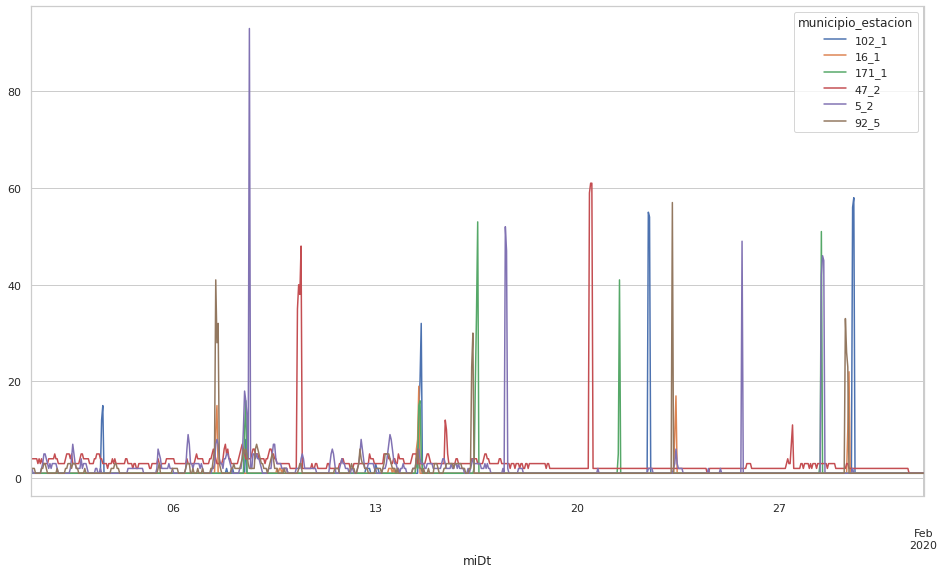

In [75]:
df1['ensayo_1'].plot()

<AxesSubplot:xlabel='miDt'>

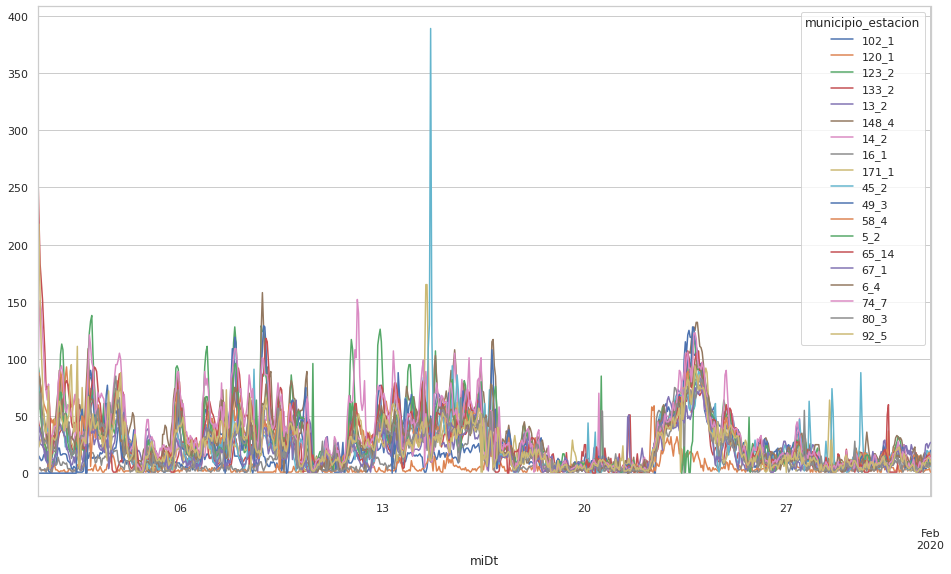

In [76]:
df1['ensayo_10'].plot()

In [78]:
df1.columns[]

('ensayo_1', '102_1')

In [80]:
df2 = df1.copy()

In [82]:
df2["day"] = df2.index.day

In [90]:
df2.head()

ensayo_1                           ensayo_10              \
municipio_estacion     102_1 16_1 171_1 47_2  5_2 92_5     102_1 120_1 123_2   
miDt                                                                           
2020-01-01 01:00:00      1.0  1.0   1.0  4.0  1.0  2.0       8.0   2.0  97.0   
2020-01-01 02:00:00      1.0  1.0   1.0  4.0  2.0  2.0      15.0   4.0  90.0   
2020-01-01 03:00:00      1.0  1.0   1.0  4.0  1.0  2.0      13.0   4.0  80.0   
2020-01-01 04:00:00      1.0  1.0   1.0  4.0  1.0  2.0      11.0   3.0  59.0   
2020-01-01 05:00:00      1.0  1.0   1.0  4.0  1.0  1.0      12.0   3.0  37.0   

                           ... ensayo_9                                        \
municipio_estacion  133_2  ...    171_1  180_1  47_2 49_3   5_2  65_14   74_7   
miDt                       ...                                                  
2020-01-01 01:00:00  50.0  ...     17.0   95.0  79.0  0.1  46.0   82.0   53.0   
2020-01-01 02:00:00  43.0  ...     18.0  124.0  80.0  0.1  41.0  150.0   92.0   
2020-01-01 03:00:00  39.0  ...     22.0  105.0  80.0  0.1  35.0  129.0  109.0   
2020-01-01 04:00:00  32.0  ...     22.0   68.0  70.0  0.1  27.0  116.0  102.0   
2020-01-01 05:00:00  27.0  ...     22.0   48.0  61.0  0.1  23.0   98.0   87.0   

                                 day  
municipio_estacion     7_4   9_1      
miDt                                  
2020-01-01 01:00:00  264.0  36.0   1  
2020-01-01 02:00:00  177.0  41.0   1  
2020-01-01 03:00:00   87.0  43.0   1  
2020-01-01 04:00:00   66.0  45.0   1  
2020-01-01 05:00:00   45.0  38.0   1  

[5 rows x 157 columns]

In [94]:
df2.columns

MultiIndex([( 'ensayo_1', '102_1'),
            ( 'ensayo_1',  '16_1'),
            ( 'ensayo_1', '171_1'),
            ( 'ensayo_1',  '47_2'),
            ( 'ensayo_1',   '5_2'),
            ( 'ensayo_1',  '92_5'),
            ('ensayo_10', '102_1'),
            ('ensayo_10', '120_1'),
            ('ensayo_10', '123_2'),
            ('ensayo_10', '133_2'),
            ...
            ( 'ensayo_9', '171_1'),
            ( 'ensayo_9', '180_1'),
            ( 'ensayo_9',  '47_2'),
            ( 'ensayo_9',  '49_3'),
            ( 'ensayo_9',   '5_2'),
            ( 'ensayo_9', '65_14'),
            ( 'ensayo_9',  '74_7'),
            ( 'ensayo_9',   '7_4'),
            ( 'ensayo_9',   '9_1'),
            (      'day',      '')],
           names=[None, 'municipio_estacion'], length=157)

<AxesSubplot:xlabel='miDt'>

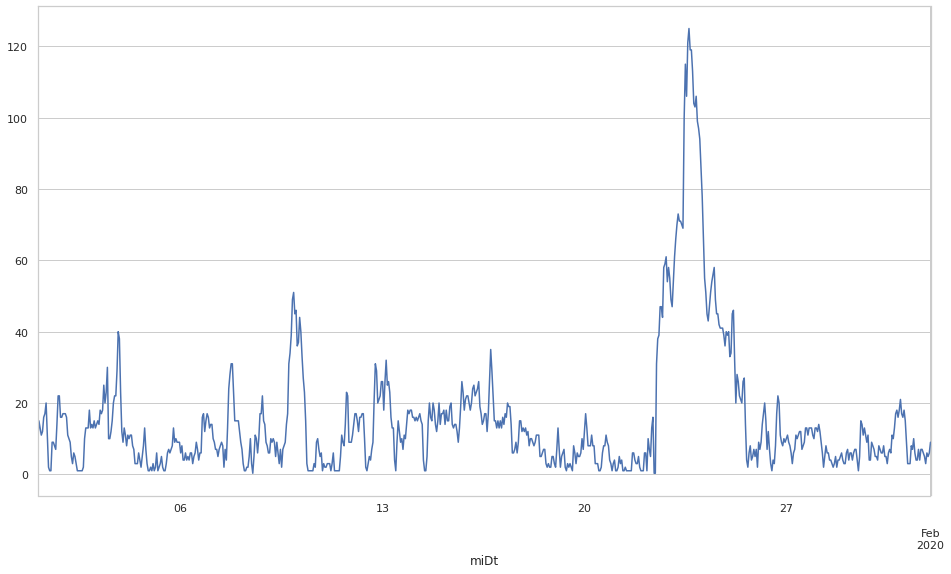

In [106]:
df2['ensayo_10', '102_1'].plot()

In [ ]:
estaciones  = ['102_1', '120_1', '123_2', '13_2', '133_2', '14_2', '148_4',
       '16_1', '161_1', '171_1', '180_1', '45_2', '47_2', '49_3', '5_2',
       '58_4', '6_4', '65_14', '67_1', '7_4', '74_7', '80_3', '9_1',
       '92_5']

In [117]:
new_col

Index(['ensayo_1', 'ensayo_6', 'ensayo_7', 'ensayo_8', 'ensayo_9', 'ensayo_10',
       'ensayo_12', 'ensayo_14', 'ensayo_20', 'ensayo_30', 'ensayo_42',
       'ensayo_44'],
      dtype='object')

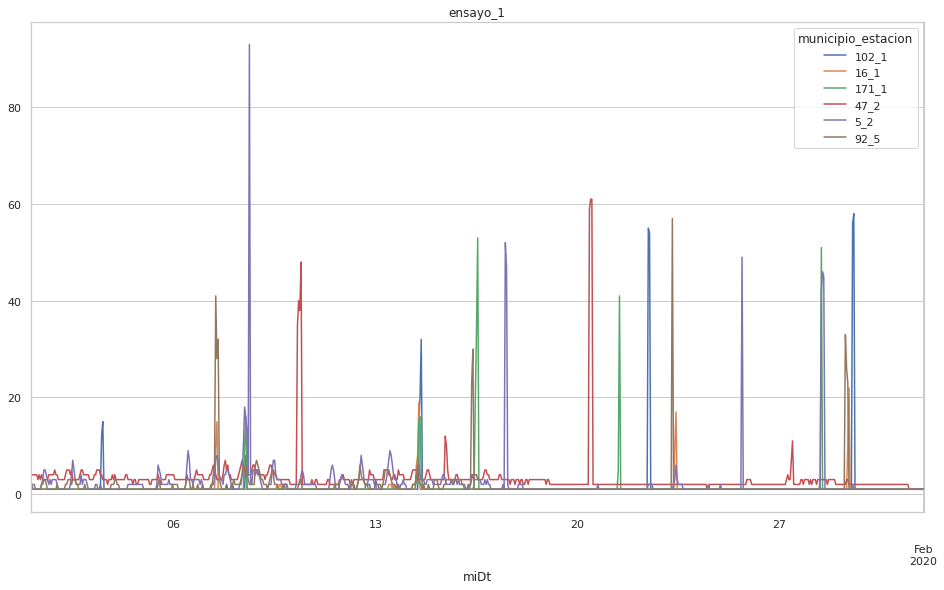

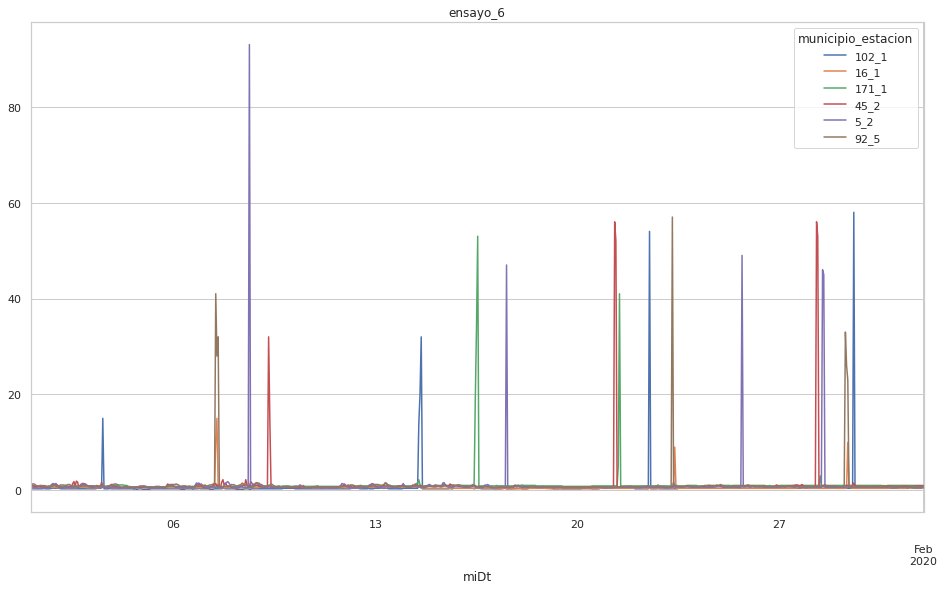

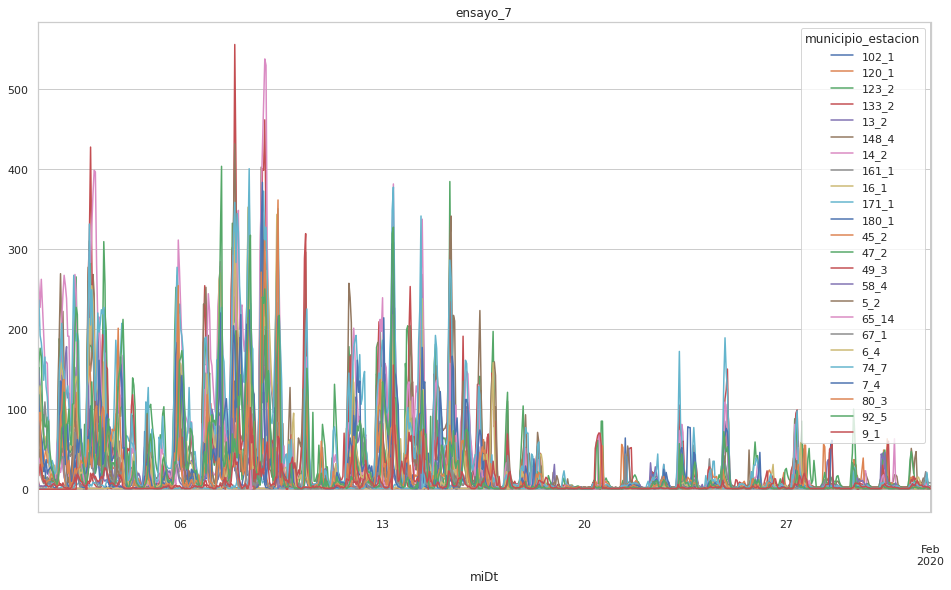

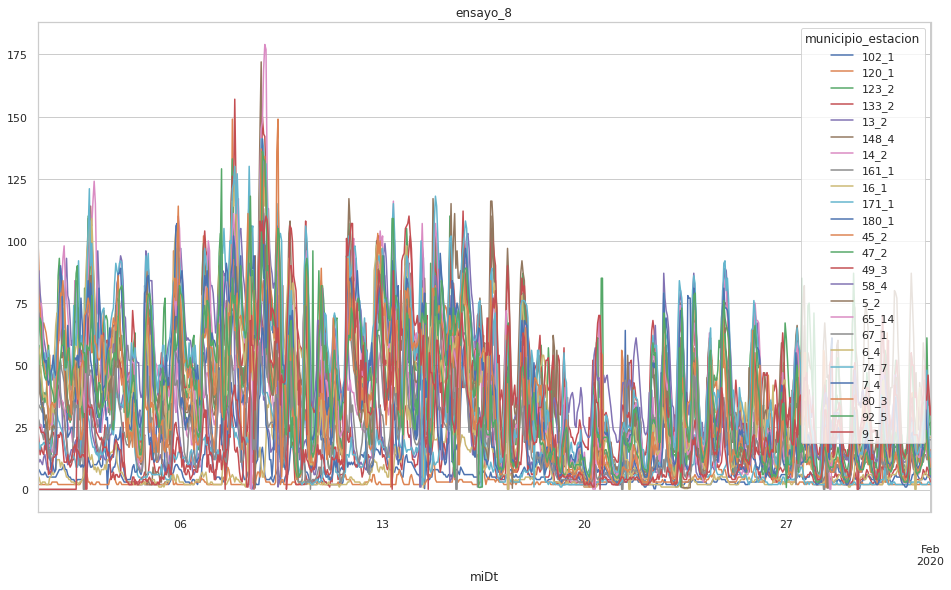

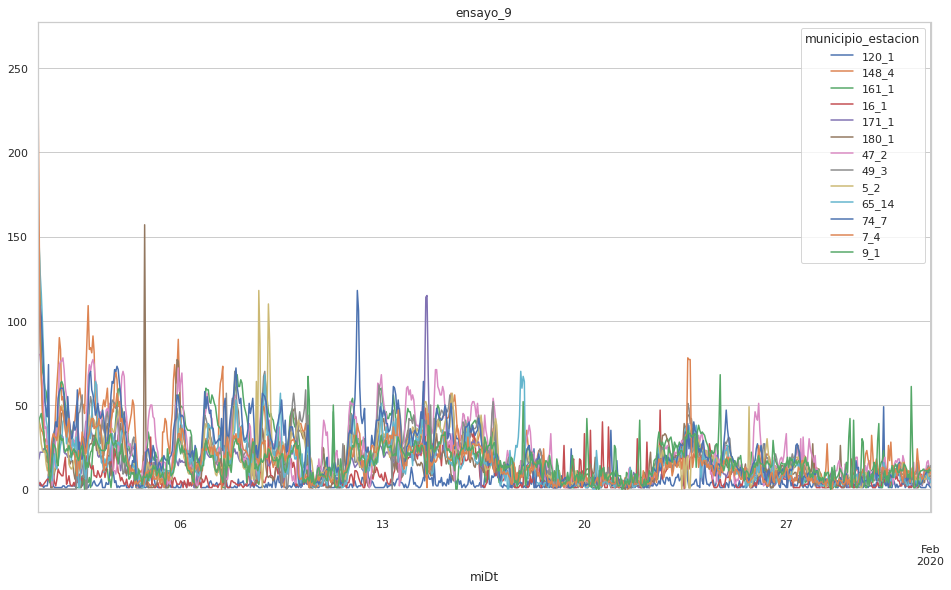

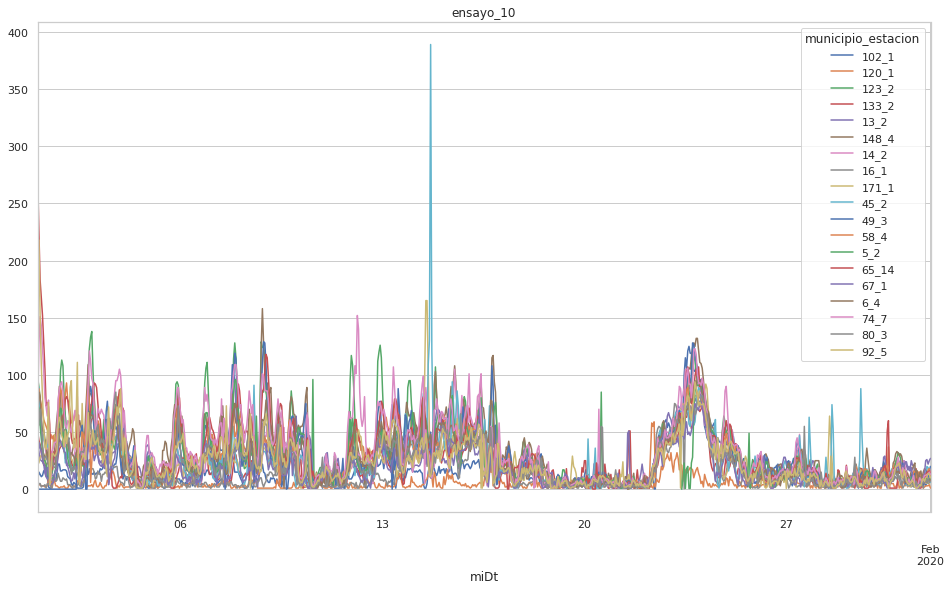

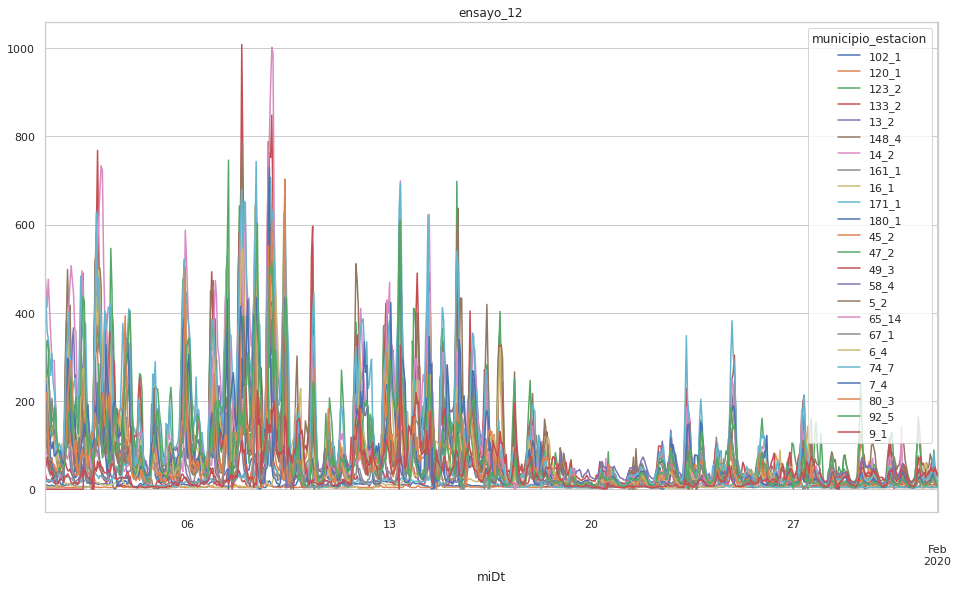

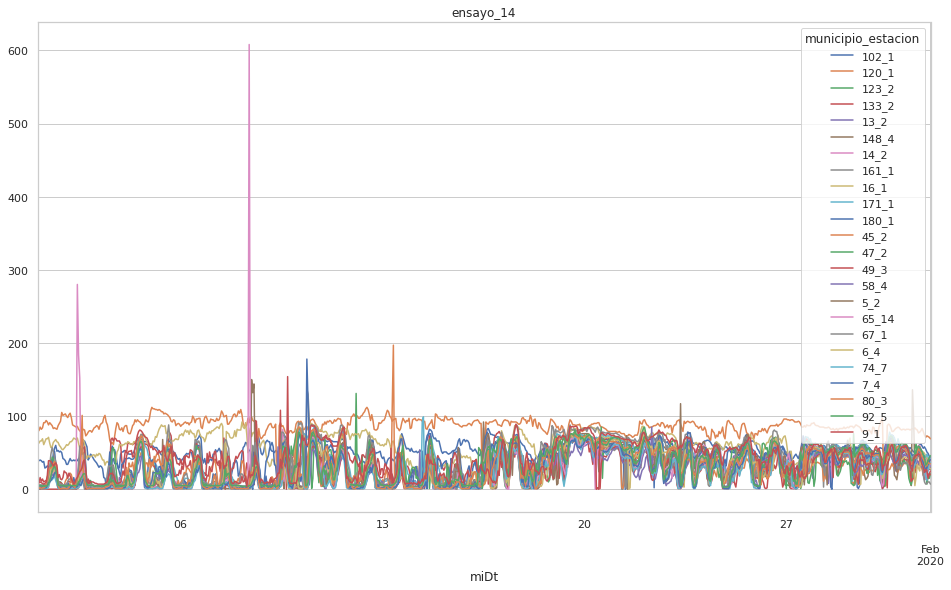

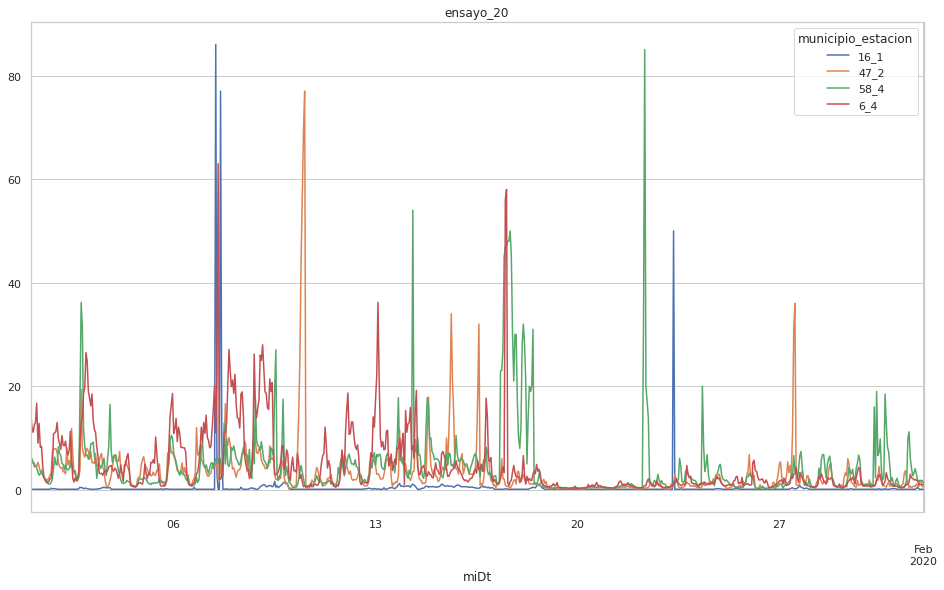

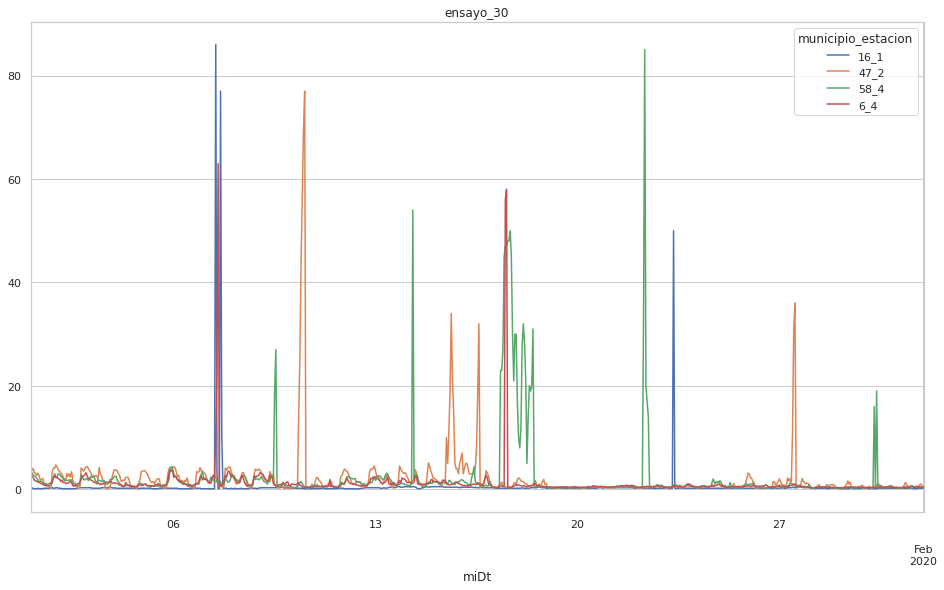

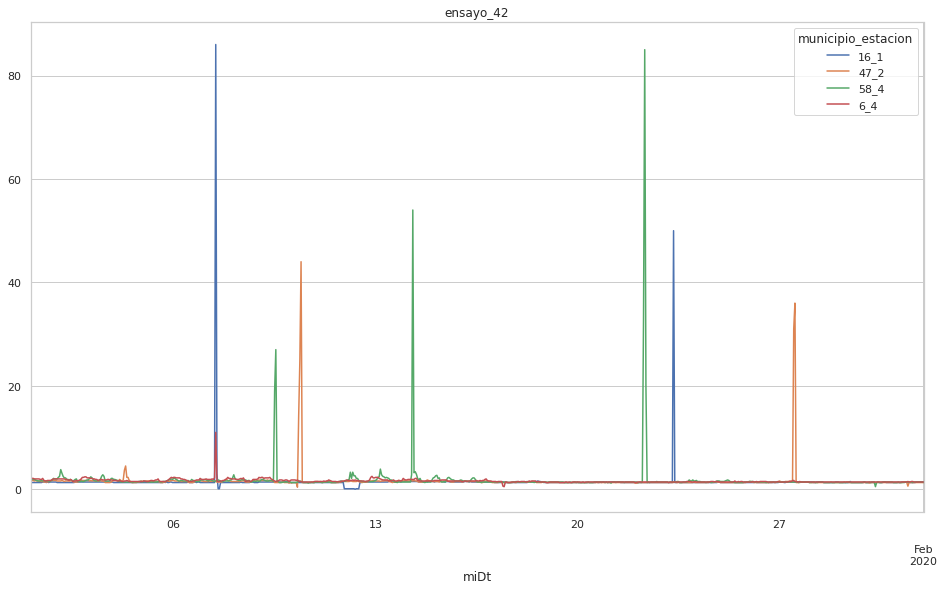

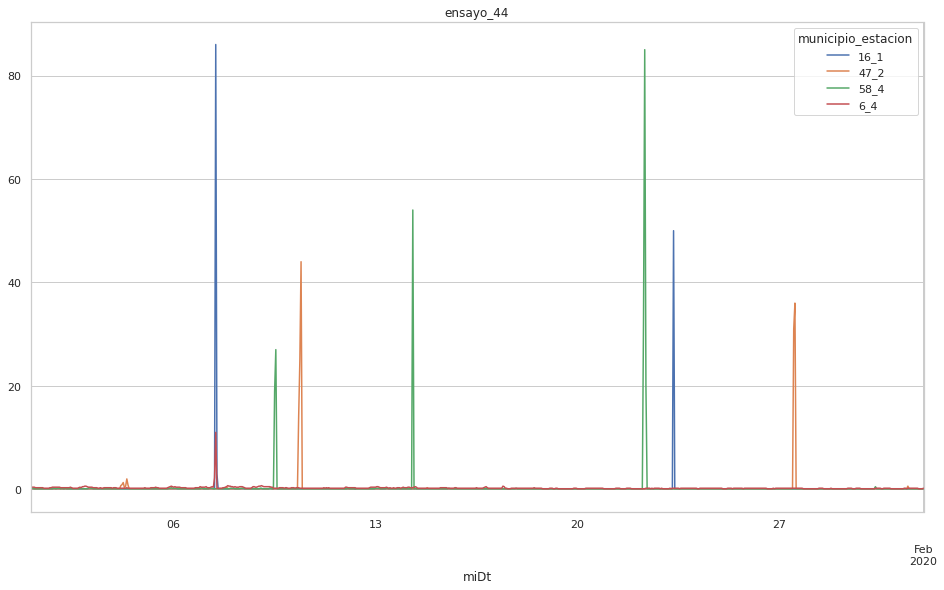

In [119]:
for i in new_col:
    df1[f'{i}'].plot(title = i)

In [ ]:
df_total.index

In [ ]:
df_total

In [ ]:
df_total['ensayo_1', '102_1'].plot()

In [ ]:
df_total.index

In [ ]:
df_total.reset_index(inplace=True)

In [ ]:
df_total

In [ ]:
multi_index = df_total.columns

In [ ]:
multi_index

In [ ]:
multi_index.tolist()

In [ ]:
new_index = pd.Index([e[0] + str(e[1]) for e in multi_index.tolist()])

In [ ]:
new_index

In [ ]:
df_total.columns = new_index

In [ ]:
df_total

In [ ]:
df_total = df_total.set_index(df_total['miDt'])


In [ ]:
df_total.drop(['miDt'], axis = 1, inplace=True)

In [ ]:
df_total.fillna(0.0)

In [ ]:
df_total.unstack(level= 1, fill_value=None).head(20)

In [ ]:
df_estacion1 =df_total.group_by(df_tota['estacion']== 1)